In [64]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

In [3]:
def calcular_metricas(y_train, y_test, pred_train, pred_test, ymodelo_nombre):
    """
    Calcula métricas de rendimiento para el modelo seleccionado.
    """

    # Métricas
    metricas_train = {
        "accuracy": accuracy_score(y_train, pred_train),
        "precision": precision_score(y_train, pred_train, average='weighted', zero_division=0),
        "recall": recall_score(y_train, pred_train, average='weighted', zero_division=0),
        "f1": f1_score(y_train, pred_train, average='weighted', zero_division=0)
    }
    metricas_test = {
        "accuracy": accuracy_score(y_test, pred_test),
        "precision": precision_score(y_test, pred_test, average='weighted', zero_division=0),
        "recall": recall_score(y_test, pred_test, average='weighted', zero_division=0),
        "f1": f1_score(y_test, pred_test, average='weighted', zero_division=0)
    }

    return pd.DataFrame({"train": metricas_train, "test": metricas_test})
        

In [24]:
df = pd.read_pickle('../data/customer_purchase_data_preprocesado.pkl').reset_index(drop=True)

### Nota importante

En este caso en particular los `1` son `sí` y los `0` son `no`.

In [25]:
df

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,Gender_Female,Gender_Male,ProductCategory_Beauty,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home Goods,ProductCategory_Sports,PurchaseStatus
0,-0.276761,-0.481934,-0.411185,0.005864,0.324752,0.596899,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,-1.564418,-1.612821,-1.090830,0.457694,0.324752,0.596899,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,-1.113738,1.158311,0.098548,0.068566,0.653061,0.275000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,-1.306887,1.423546,1.457838,0.924570,0.324752,0.639535,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,-0.856207,0.400133,1.457838,-0.626987,0.324752,0.275000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,-1.500035,1.118585,0.837629,0.677641,0.653061,0.639535,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
1536,-1.653247,1.728984,-0.103793,0.500507,0.340418,0.594706,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1537,-1.365196,-1.306567,-0.632390,0.523515,0.653061,0.404050,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
1538,-0.282957,1.437962,-0.500229,0.704866,0.600976,0.332832,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [26]:
X = df.drop(columns='PurchaseStatus')
y = df['PurchaseStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

modelo_logistica = LogisticRegression()

modelo_logistica.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_pred_test = modelo_logistica.predict(X_test)
y_pred_test_prob = modelo_logistica.predict_proba(X_test)

In [38]:
# Recordar hacer el reset_index para que pd.concat lo una bien
df_pred = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred_test).reset_index(drop=True)], axis=1)
# Renombramos las columnas
df_pred.columns = ['Real', 'Predicho']

In [44]:
df_pred[df_pred['Real'] != df_pred['Predicho']].shape[0]

55

In [ ]:
df_pred[df_pred['Real'] == df_pred['Predicho']].shape[0]

253

#### Matriz de confusión

Nos permite ver cuántos falsos positivos y falsos negativos tenemos

In [47]:
matriz_conf = confusion_matrix(y_test, y_pred_test)

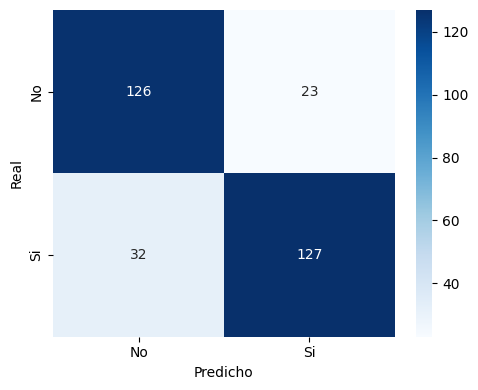

In [59]:
plt.figure(figsize=(5,4))
etiquetas = ['No', 'Si']

sns.heatmap(matriz_conf, 
            annot=True,
            fmt = "d",
            xticklabels=etiquetas,
            yticklabels=etiquetas,
            cmap='Blues')

plt.xlabel('Predicho')
plt.ylabel('Real')
plt.tight_layout()

---

### Métricas

* `accuracy`: proporción de predicciones correctas. No captura bien la clase minoritaria por lo que hay que tener cuidado con el desbalanceo.

    $ acc = \frac{VP + VN}{total} $

* `precision`: proporción de verdaderos postitivos respecto al total de positivos, independientemente de si realmente son positivos o no. Cómo de seguros estamos de que los positivos PREDICHOS son correctos.

    $ prec = \frac{VP}{VP + FP} $

* `recall`: de todos los casos **realmente** positivos, cuántos hemos acertado. 

    $ prec = \frac{VP}{VP + FN} $

* `f1_score`: media armónica de `precision` y `recall`

    $ f1 = \frac{2 (precision \cdot recall)}{precision + recall} $

* `especificidad`: `recall` pero con los negativos, es decir, de todos los casos **realmente** negativos, cuántos hemos acertado. 

    $ esp = \frac{VN}{VN + FP} $

* `kappa`: mide si nuestras predicciones son aleatorias o no. 

    * Si $ \kappa = 0 \rightarrow $ azar

    * Si $ \kappa = 1 \rightarrow $ predicciones muy consistentes

    * Si $ \kappa < 0 \rightarrow $ predicciones peores que el azar

* `auc/roc`:

### Casuísticas

En qué casos prefiero fallar más en los positivos o los negativos (porque en ninguna es muy difícil). Estos criterios nos ayudan a elegir el mejor modelo para nuestro problema en concreto.

* Dejar pasar negativos y minimizar positivos `FN`⬇`FP`⬆: Cáncer, aeropuertos, mantenimiento, freude, incendios

    * Nos interesa `recall` mayor aunque sacrifiquemos `precision`

* Dejar pasar positivos y minimizar negativos `FN`⬆ `FP`⬇: Curriculum, justicia, recomendaciones, inversiones, créditos.

    * Nos interesa `precision` mayor aunque sacrifiquemos `recall`

* Si queremos un compromiso entre ambas situaciones o si los datos están muy desbalanceados

    * Trataremos de minimizar `f1_score` 

In [ ]:
# Ratio de falsos negativos, verdaderos positivos y umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:,1])

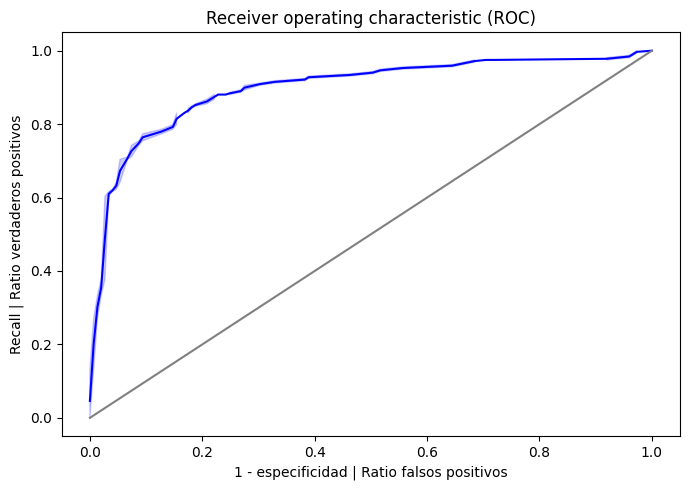

In [87]:
plt.figure(figsize=(7,5))

sns.lineplot(x=fpr, y=tpr, color='blue')
sns.lineplot(x=[0, 1], y = [0, 1], color = 'grey')


plt.xlabel("1 - especificidad | Ratio falsos positivos")
plt.ylabel("Recall | Ratio verdaderos positivos")
plt.title("Receiver operating characteristic (ROC)")
plt.tight_layout()

Nos falta el área bajo la curva, que queremos que sea lo mayor posible (el máximo es 1).

Cada punto es cada ratio para cada umbral de clasificación de la regresión logística.